All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

Note: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

- Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.
- Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.
- Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.
- Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
- Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [13]:
import torch

device = 'gpu' if torch.cuda.is_available() else 'cpu'

In [14]:
X = torch.arange(0,1, 0.01, device=device).unsqueeze(dim=1)

weight = .3
bias = .9

y = .3 * X +.9

In [15]:
split = int(len(X)*.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X)

100

In [23]:
import matplotlib.pyplot as plt
def plot_shit(train_label=X_train, train_target=y_train, test_label=X_test, test_target=y_test, pred=None):
    fig, ax = plt.subplots()
    ax.scatter(train_label, train_target, c="b", s=1, label="Train Data")
    ax.scatter(test_label, test_target, c='r', s=1, label="Test Data")
    ax.legend()
    if pred is not None:
        ax.scatter(X_test, pred, c='g',s=1,label="pred Data")

    

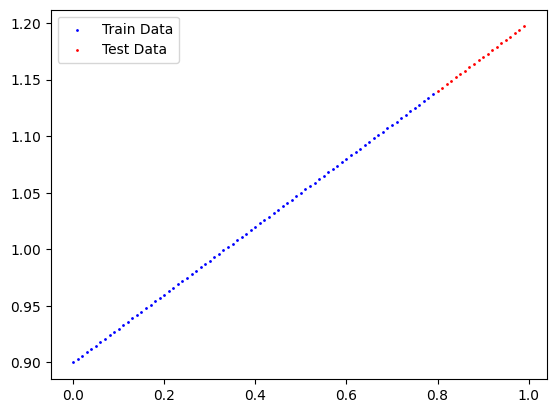

In [24]:
plot_shit()

In [26]:
from torch import nn
class linearRegress3(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Linear(in_features=1, out_features=1, device=device)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear(x)
        

In [27]:
play_model = linearRegress3()
play_model.state_dict()

OrderedDict([('linear.weight', tensor([[0.4023]])),
             ('linear.bias', tensor([-0.2911]))])

In [33]:
# create loss and optim

loss_fn = torch.nn.L1Loss()

optim = torch.optim.SGD(params=play_model.parameters(), lr=0.01)

In [34]:
epochs = 700

epoch_list = []
loss_list =[]
tst_loss_list = []


for epoch in range(epochs):
    play_model.train()
    
    y_pred = play_model(X_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optim.zero_grad()
    
    loss.backward()
    
    optim.step()
    
    play_model.eval()
    with torch.inference_mode():
        y_pred_test = play_model(X_test)
        test_loss = loss_fn(y_pred_test, y_test)
    
    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (20) must match the size of tensor b (80) at non-singleton dimension 0